# Content
- Confidence intervals for the mean (both σ known and unknown)
- Confidence intervals for proportions (and sample size)
- Confidence intervals for the variance and standard deviation

In [1]:
# Imports
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Confidence intervals for the mean

Goal is to **compare the sample mean (estimate) with a the population mean (real)**.

We want to **measure the accuracy of an estimate**. This cannot be done with a point estimate.


## Definitions

**Confidence level** of interval estimate of a parameter: probability that the interval estimate contains the parameter. The common confidence levels are:
- 90%
- 95%
- 99%

**Confidence interval**: specific interval estimate of a parameter determined by using data from a sample and a given confidence level of estimate.

**Margin of error**: maximum likely difference between point estimate of parameter and actual value of parameter.

## Formulas

Margin of error = E = Z∝/2(∝/√n)


### Sigma known

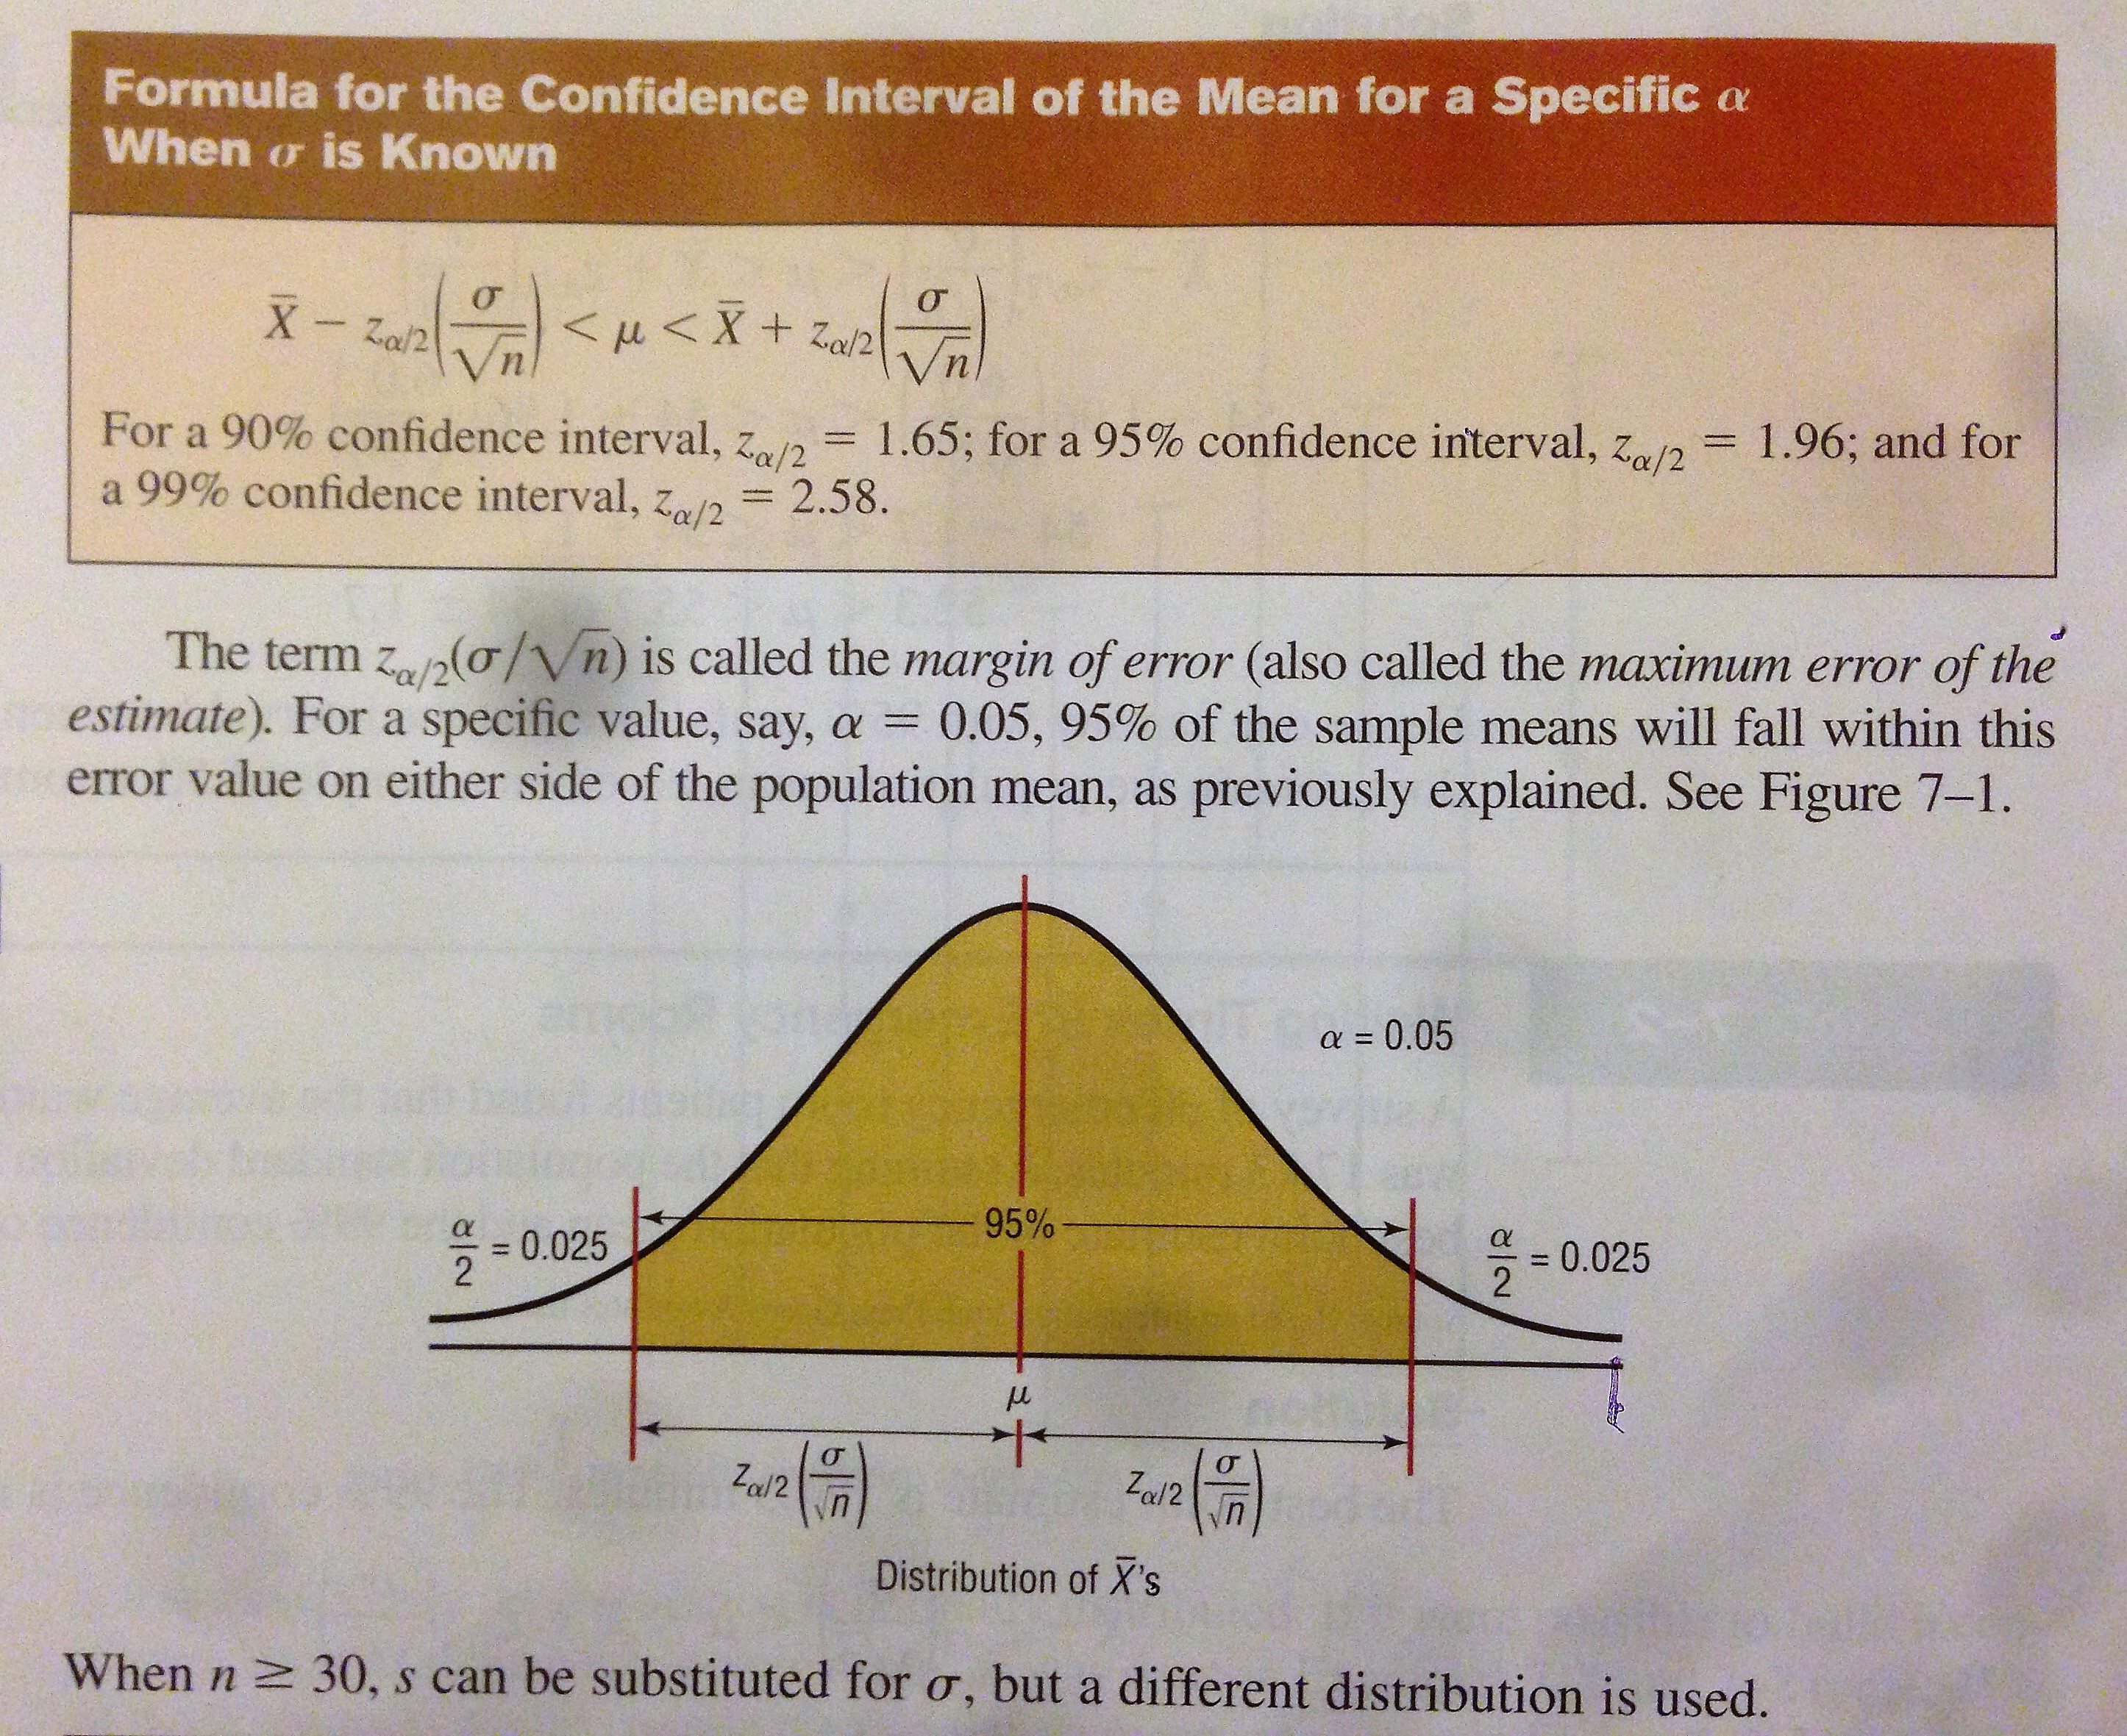

### Sigma unknown

Use sample STD and **t distribution** to keep CI at given level.

t distribution is similar to normal distribution, but includes concept of degree of freedom. 
As sample size increases, t distribution approaches normal distribution.

**Assumptions**:
1. Sample is random sample
2. n >= 30 or population is normally distributed with n < 30

**Degree of freedom**: number of values that are free to vary in a sample. In most cases, df = n - 1.
In numpy, 1 is the ddof.

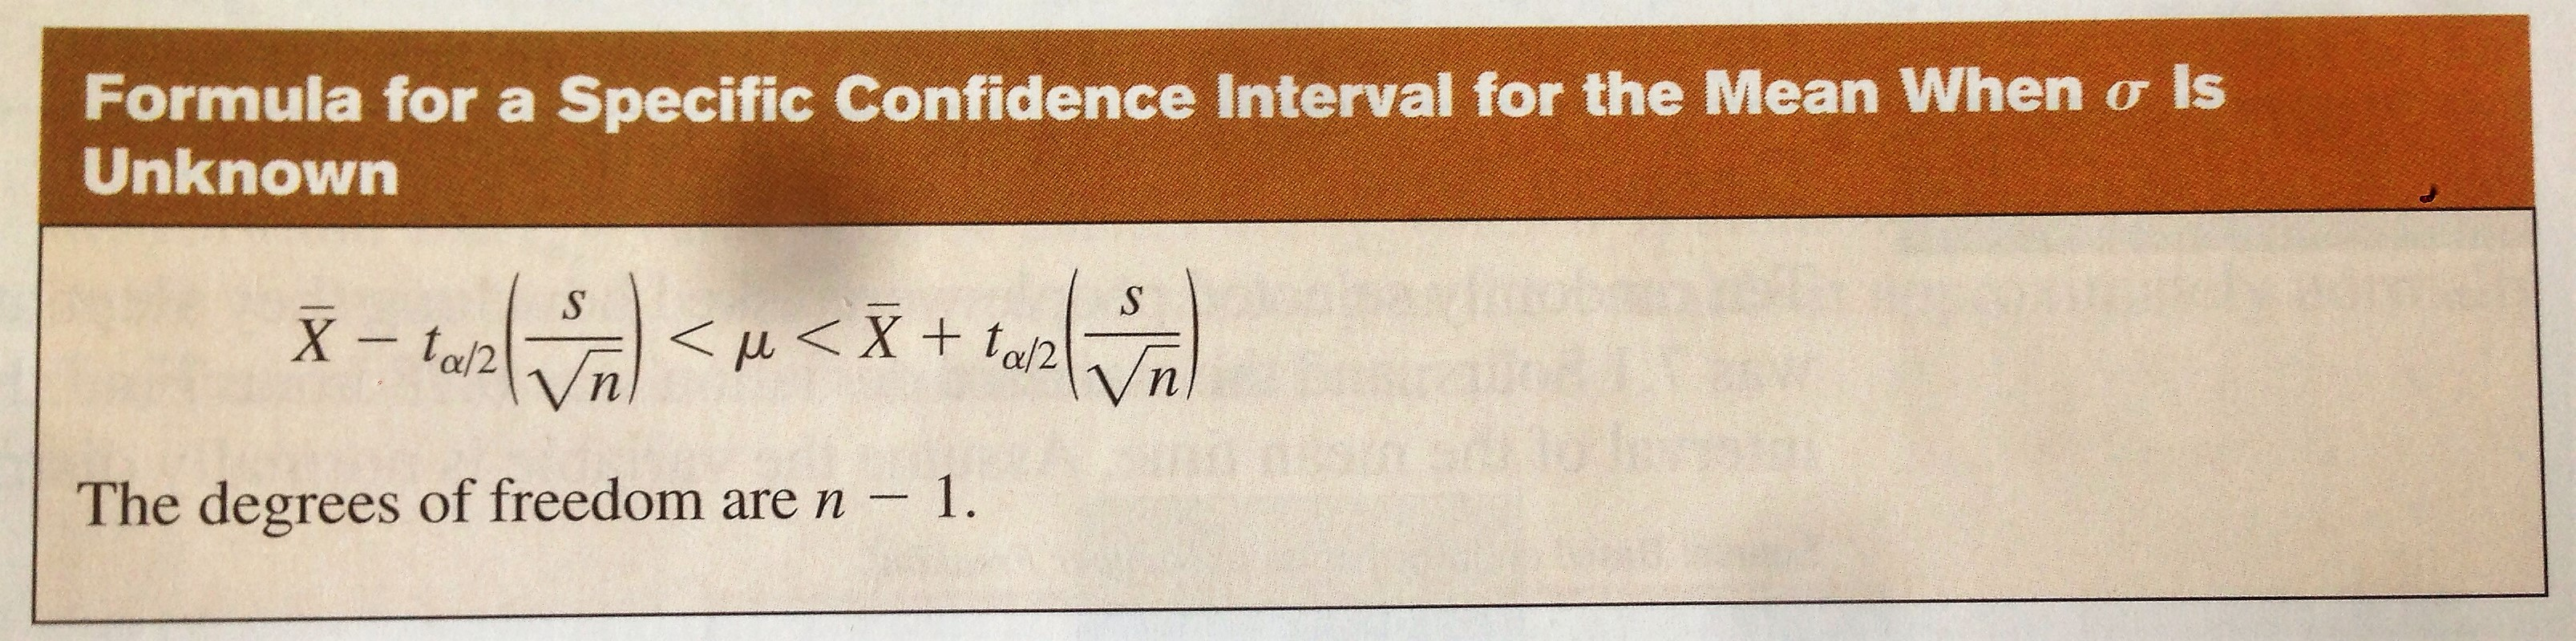

### Decision Flow

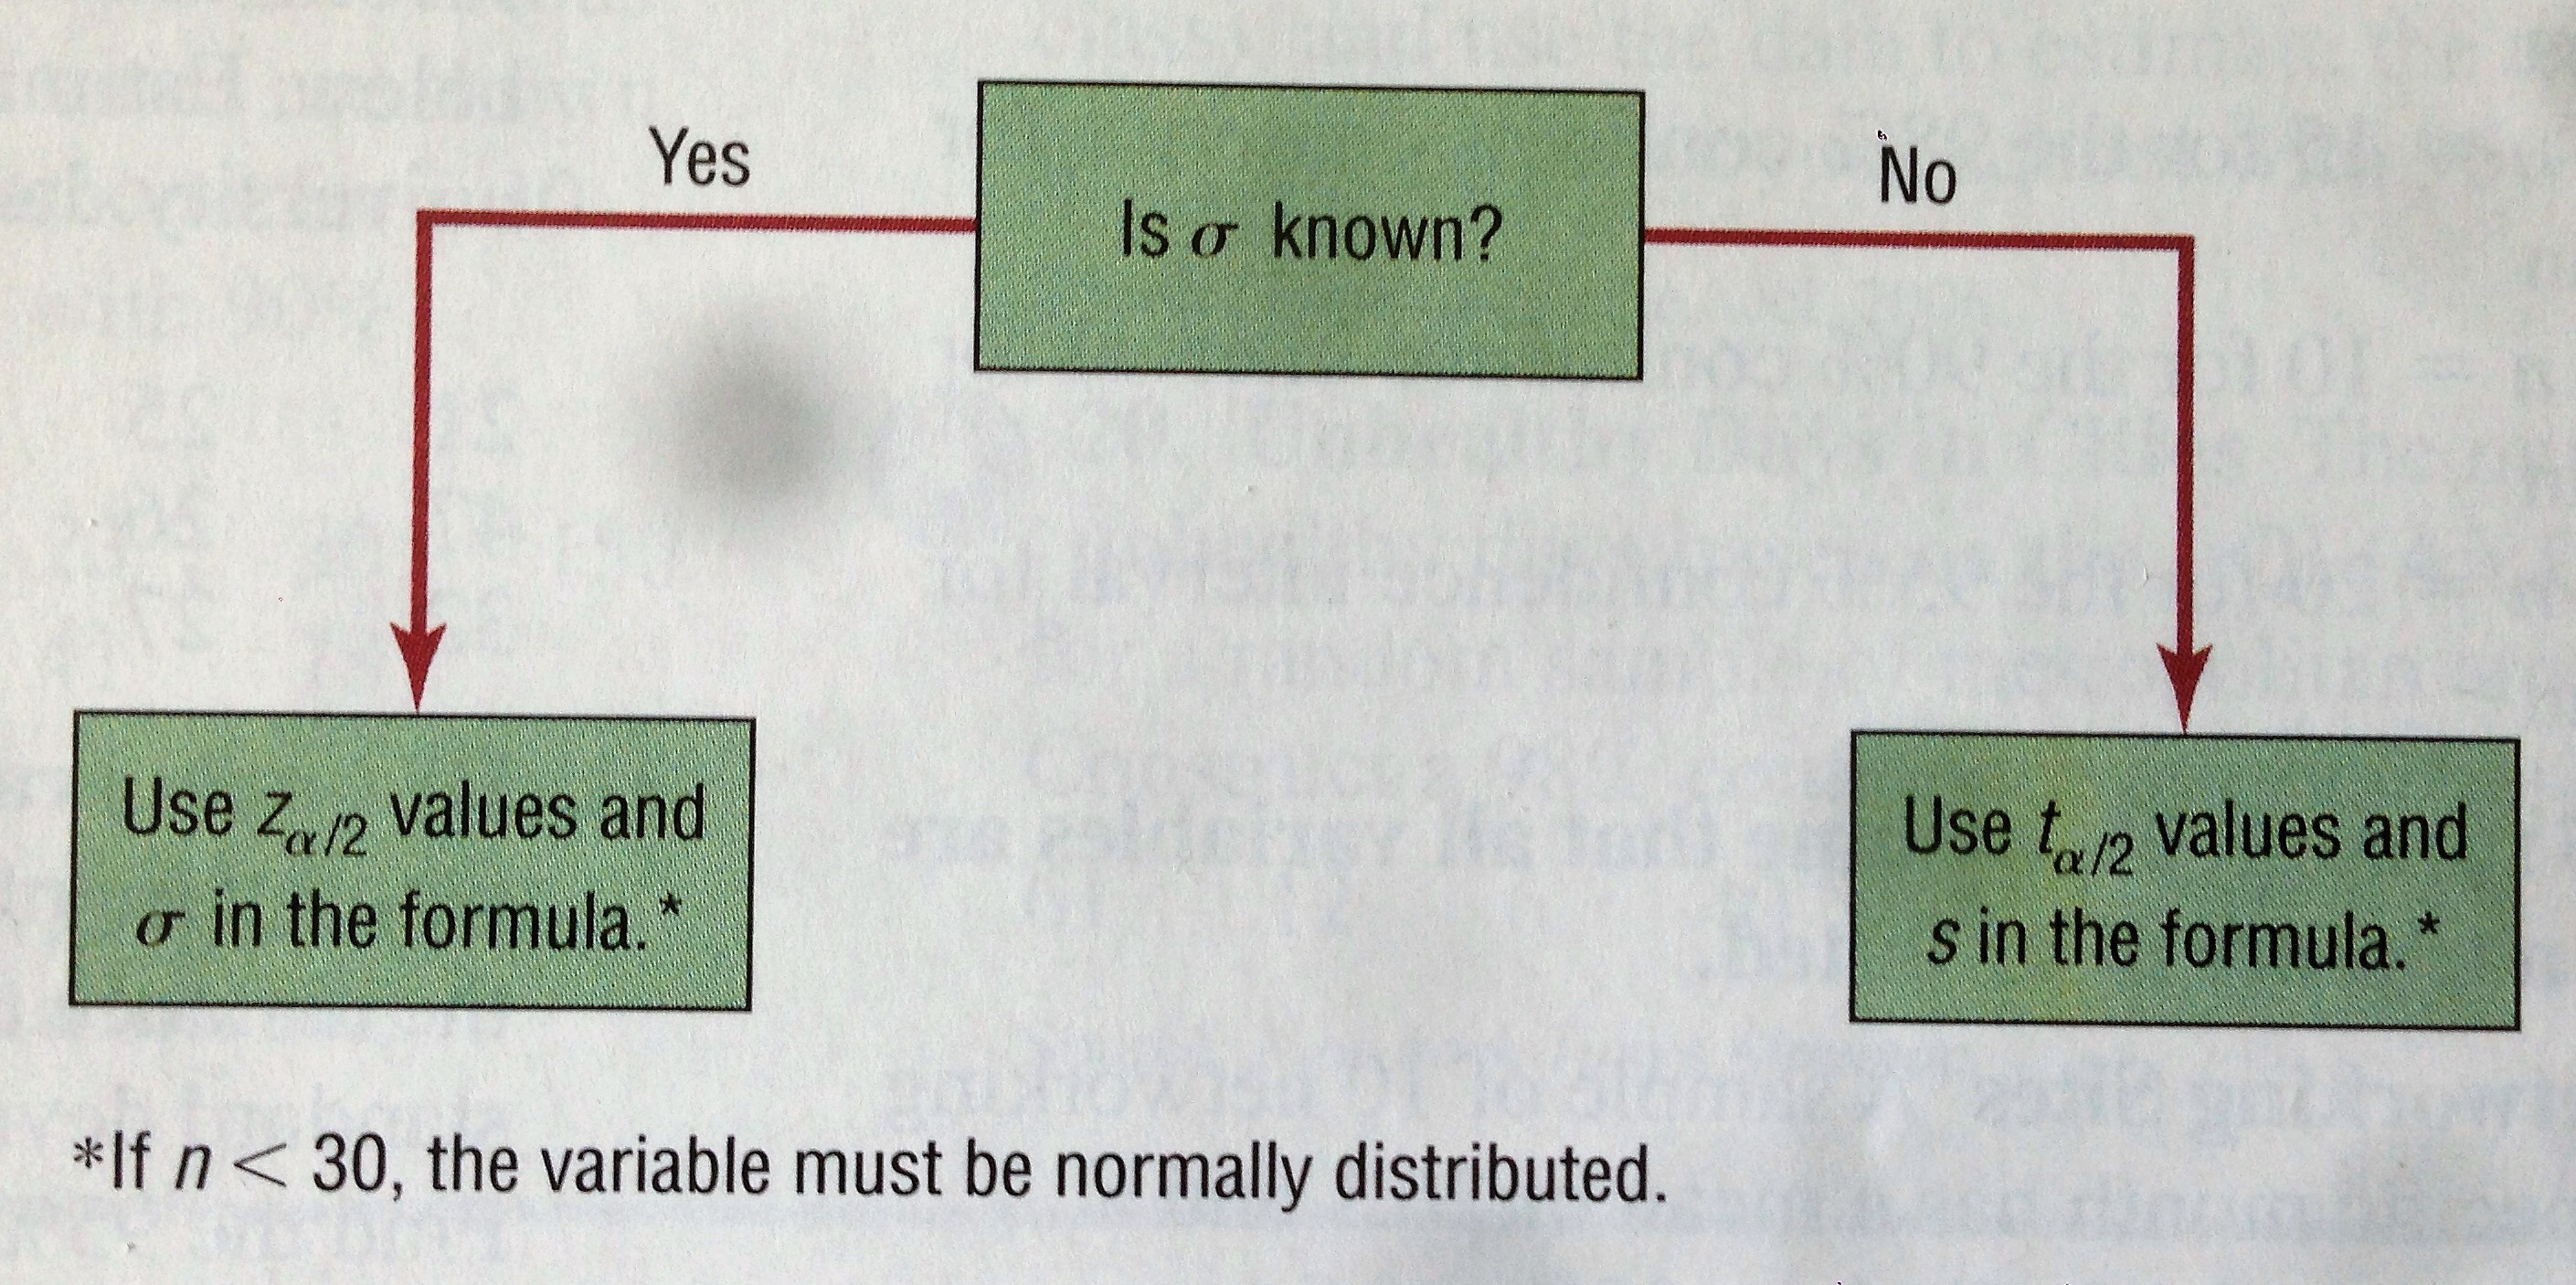

In [2]:
def compute_confidence_interval_for_mean(
    dataset,
    population_std=None
):
    r"""
    Compute the confidence interval of the mean. 
    Works for σ known and unknown.
    """
    dataset_np = np.array(dataset)
    confidence_list = [.9, .95, .99]
    n = len(dataset_np) # sample size  
    df = n-1 # degree of freedom
    mean = np.mean(dataset_np) # sample mean
    sample_std = np.std(dataset_np, ddof=1) # sample standard deviation
    ci_dict = dict() # confidence interval dictionary (output)
    
    print('Mean:', round(mean, 2))
    print('Sample STD:', round(sample_std, 2))
    print('')
    
    for confidence in confidence_list:
            
        if population_std: # When σ known
            margin_of_error = population_std/np.sqrt(n)
            alpha_half = (1 - confidence) / 2
            z_value_alpha_half = stats.norm.ppf(1 - alpha_half)
            h = z_value_alpha_half * margin_of_error
        
        else: # When σ unknown                 
            margin_of_error = scipy.stats.sem(dataset_np) # standard error of the sample mean            
            h = margin_of_error * scipy.stats.t.ppf((1 + confidence)/2, df)
    
        # Result
        ci_left = mean - h
        ci_right = mean + h
        ci_dict[confidence] = {
            'point_estimate': mean,
            'ci_left': ci_left,
            'ci_right': ci_right,
        }
        print(
            'With ' + str(int(confidence*100)) + '% confidence, the population mean is between', 
            round(ci_left, 2), 'and', round(ci_right, 2)
        )
    
    return ci_dict

In [3]:
credit_union_asset_list = [
    12.23, 16.56, 4.39,
    2.89, 1.24, 2.17,
    13.19, 9.16, 1.42,
    73.25, 1.91, 14.64,
    11.59, 6.69, 1.06,
    8.74, 3.17, 18.13,
    7.92, 4.78, 16.85,
    40.22, 2.42, 21.58,
    5.01, 1.47, 12.24,
    2.27, 12.77, 2.76,
]
population_standard_deviation = 14.405

ci = compute_confidence_interval_for_mean(
    credit_union_asset_list,
    population_standard_deviation
)

Mean: 11.09
Sample STD: 14.41

With 90% confidence, the population mean is between 6.76 and 15.42
With 95% confidence, the population mean is between 5.94 and 16.25
With 99% confidence, the population mean is between 4.32 and 17.87


## Sample size

How to determine the minimum sample size to be x% confident that the estimated mean is accurate with given E?

n = ((Z∝/2 - ∝)/E)²

In [50]:
def compute_min_n_for_mean(
    margin_of_error,
    population_std=None,
):
    r"""
    Compute the minimum value of n. 
    Works for σ known and unknown.
    """
    confidence_list = [.9, .95, .99]
    n_dict = dict()
    
    for confidence in confidence_list:
            
        if population_std: # When σ known
            
            alpha = 1 - confidence
            alpha_half = alpha / 2
            z_value_alpha_half = stats.norm.ppf(1 - alpha_half)
            n = math.ceil(np.power((z_value_alpha_half*population_std/margin_of_error), 2))            
        
        else: # When σ unknown  
            pass
        
        # Results
        n_dict[confidence] = n
        print(
            'The minimum sample size (n) to be ' + str(int(confidence*100)) + '% confident that the estimate is accurate within',
            margin_of_error, 'margin of error is',
            str(n) + '.'
        )
        
    return n_dict

In [51]:
n = compute_min_n_for_mean(
    2,
    population_std=4.33,
)

The minimum sample size (n) to be 90% confident that the estimate is accurate within 2 margin of error is 13.
The minimum sample size (n) to be 95% confident that the estimate is accurate within 2 margin of error is 19.
The minimum sample size (n) to be 99% confident that the estimate is accurate within 2 margin of error is 32.


# Confidence intervals for proportions (and sample size)

## Symbols
- X = number of sample units with characteristics of interest
- E = margin of error for sample proportion of CI
- p = population proportion
- p̂ = sample proportion ("p hat")

## Formulas

p̂ = X/n

q̂ = (n-X)/n = 1-p̂

E = Z∝/2 √(p̂q̂/n)

## Rule
p̂ - E < p < p̂ + E, with np̂ and nq̂ >= 5

In [59]:
def compute_confidence_interval_for_proportion(
    n,
    X,
):
    r"""
    Compute the confidence interval of the proportion.    
    """    
    confidence_list = [.9, .95, .99]            
    ci_dict = dict() # confidence interval dictionary (output)
        
    for confidence in confidence_list:
        
        p_hat = X / n
        q_hat = 1 - p_hat
                
        alpha_half = (1 - confidence) / 2
        z_value_alpha_half = stats.norm.ppf(1 - alpha_half)
        margin_of_error = z_value_alpha_half*np.sqrt(p_hat*q_hat/n)      
    
        # Result
        ci_left = p_hat - margin_of_error
        ci_right = p_hat + margin_of_error
        ci_dict[confidence] = {
            'ci_left': ci_left,
            'ci_right': ci_right,
        }
        print(
            'With ' + str(int(confidence*100)) + '% confidence:',
            str(round(ci_left*100, 2)) + '%', '< p <', str(round(ci_right*100, 2)) + '%'
        )
    
    return ci_dict

In [63]:
ci = compute_confidence_interval_for_proportion(
    n=1404,
    X=323,
)

print('')
ci = compute_confidence_interval_for_proportion(
    n=1721,
    X=1721*.159,
)

With 90% confidence: 21.16% < p < 24.85%
With 95% confidence: 20.8% < p < 25.21%
With 99% confidence: 20.11% < p < 25.9%

With 90% confidence: 14.45% < p < 17.35%
With 95% confidence: 14.17% < p < 17.63%
With 99% confidence: 13.63% < p < 18.17%


## Minimum sample size

n = p̂q̂(Z∝/2/E)²

If p̂ unknown, use p̂ = 0.5 (p̂q̂ will have maximum possible value of 0.25)

In [71]:
def compute_min_n_for_proportion(
    margin_of_error,
    p_hat=0.5
):
    r"""
    Compute the minimum value of n. 
    """
    confidence_list = [.9, .95, .99]
    n_dict = dict()
    q_hat = 1-p_hat
    
    for confidence in confidence_list:

        alpha = 1 - confidence
        alpha_half = alpha / 2
        z_value_alpha_half = stats.norm.ppf(1 - alpha_half)
        n = math.ceil(p_hat*q_hat*np.power(z_value_alpha_half/margin_of_error, 2))              
            
        # Results
        n_dict[confidence] = n
        print(
            'The minimum sample size (n) to be ' + str(int(confidence*100)) + '% confident that the estimate is accurate within',
            margin_of_error, 'margin of error is',
            str(n) + '.'
        )
        
    return n_dict

In [73]:
n = compute_min_n_for_proportion(
    0.02,
    p_hat=0.4
)

print()

n = compute_min_n_for_proportion(
    0.03
)

The minimum sample size (n) to be 90% confident that the estimate is accurate within 0.02 margin of error is 1624.
The minimum sample size (n) to be 95% confident that the estimate is accurate within 0.02 margin of error is 2305.
The minimum sample size (n) to be 99% confident that the estimate is accurate within 0.02 margin of error is 3981.

The minimum sample size (n) to be 90% confident that the estimate is accurate within 0.03 margin of error is 752.
The minimum sample size (n) to be 95% confident that the estimate is accurate within 0.03 margin of error is 1068.
The minimum sample size (n) to be 99% confident that the estimate is accurate within 0.03 margin of error is 1844.


# Confidence intervals for the variance and standard deviation

Here we use the chi-square distribution (χ2), which is skewed to the right.

## Assumptions
1. Sample is random sample
2. Population must be normally distributed

## Formula

χ2 = (n-1)s²/σ²

df = n-1

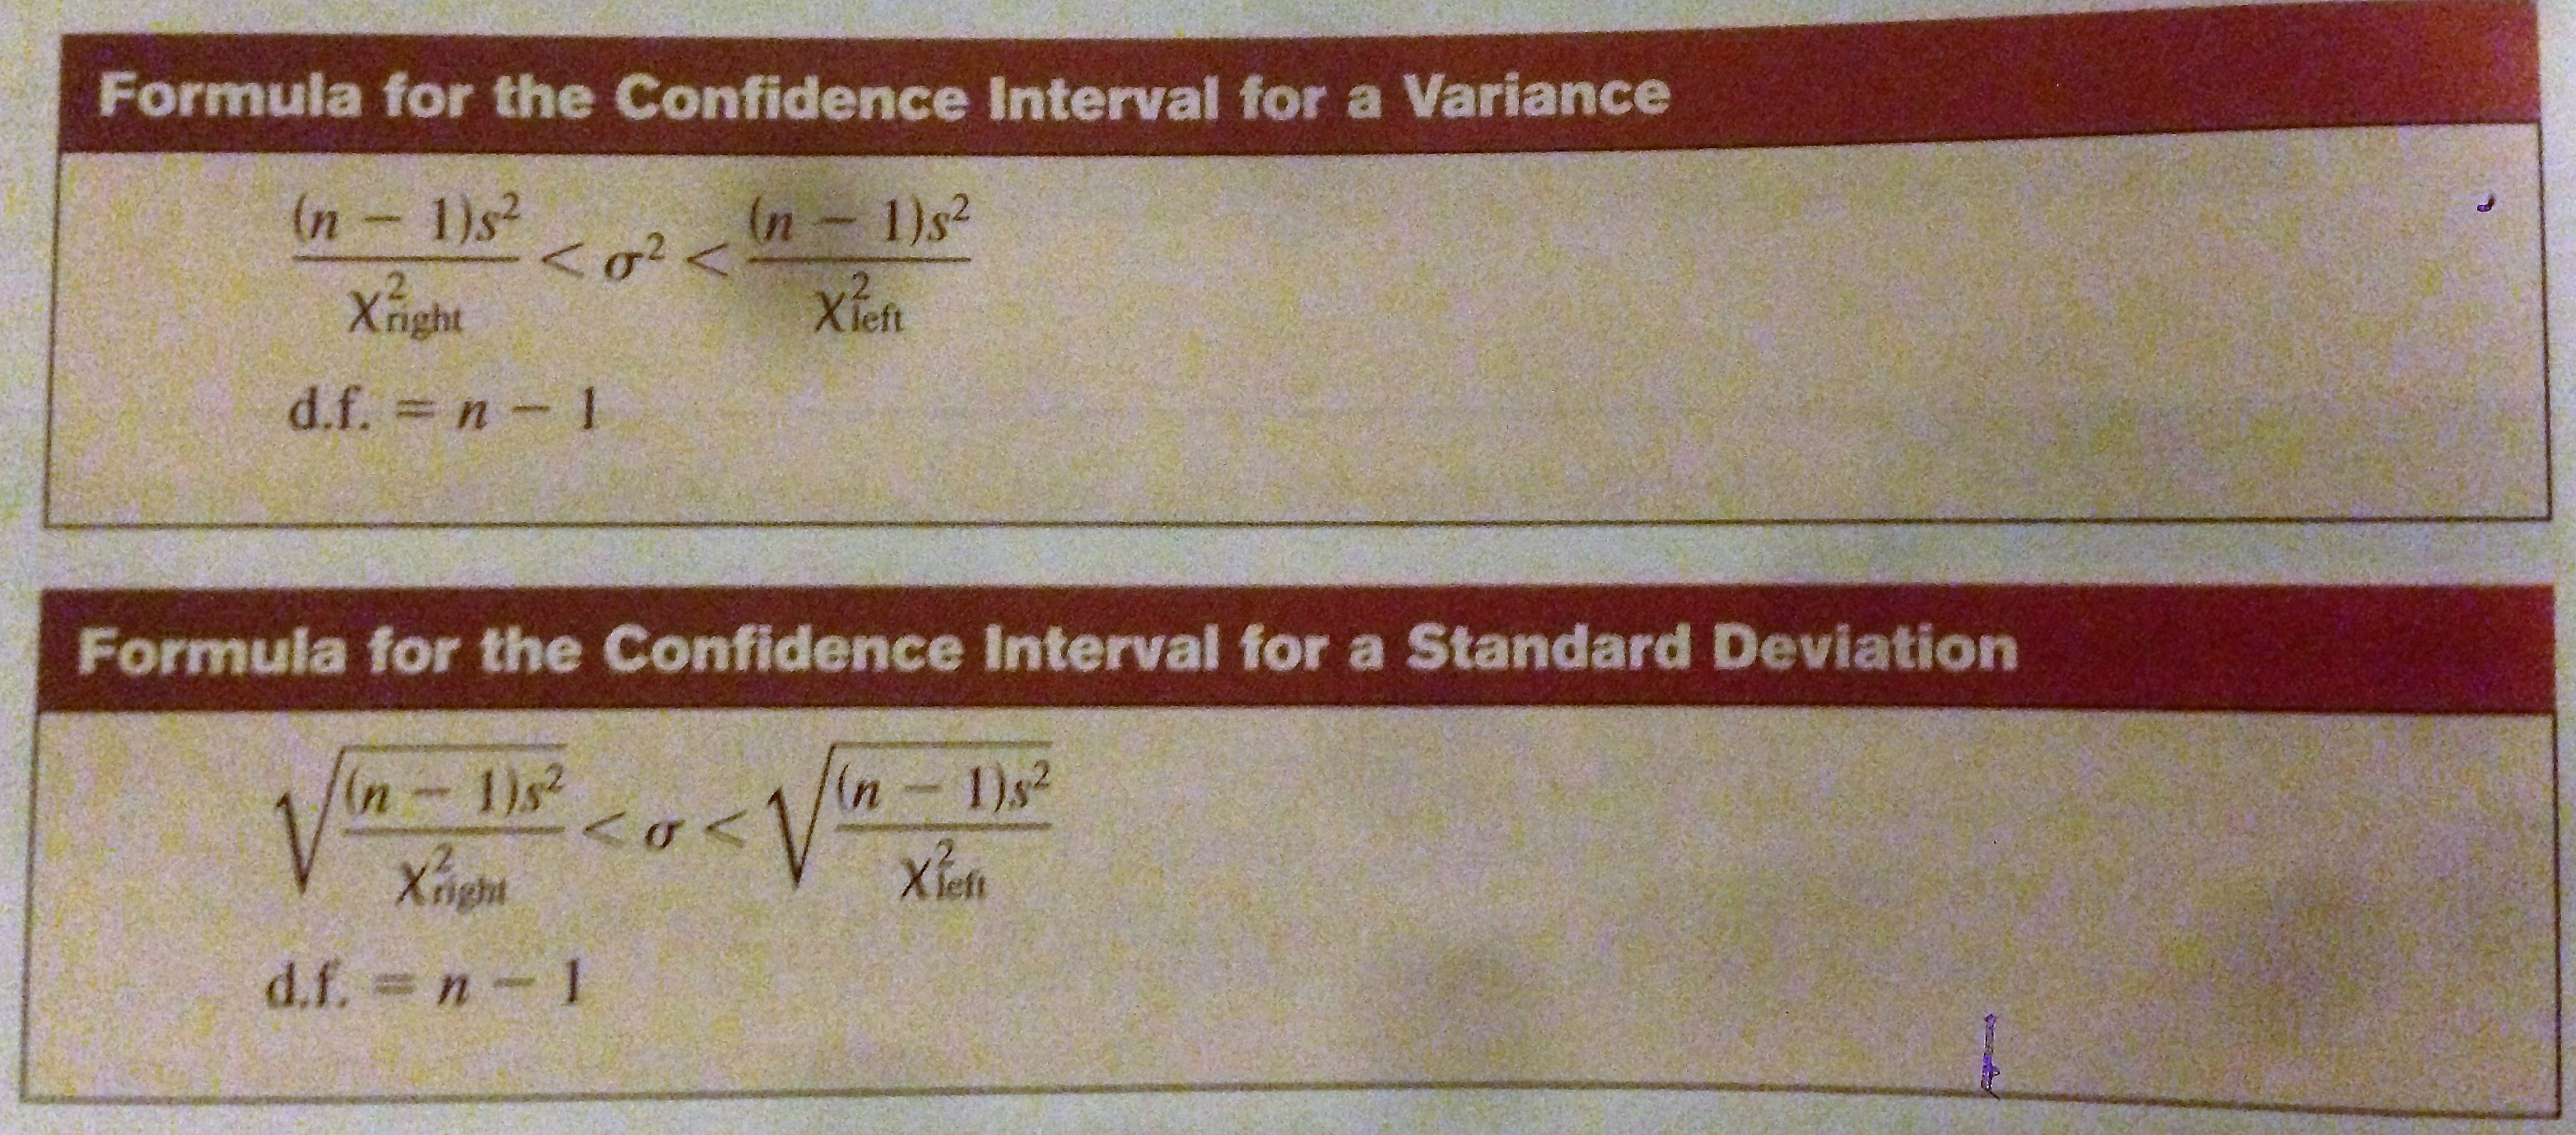

In [95]:
def compute_chi_square(
    n,
    confidence=.95
):
    df = n - 1    
    alpha = 1 - confidence
    alpha_half = alpha / 2
    
    chi_square_right = stats.chi2.isf(alpha_half, df)
    chi_square_left = stats.chi2.isf(1-alpha_half, df)    
    
    return chi_square_right, chi_square_left

In [97]:
chi_square_right, chi_square_left = compute_chi_square(
    25,
    confidence=.90
)
print('chi-square right:', round(chi_square_right, 2))
print('chi-square left:', round(chi_square_left, 2))

chi-square right: 36.42
chi-square left: 13.85


In [114]:
def compute_confidence_interval_for_variance(
    dataset,
    printout=True
):
    r"""
    Compute the confidence interval of the variance.
    """
    dataset_np = np.array(dataset)
    confidence_list = [.9, .95, .99]
    n = len(dataset_np) # sample size  
    df = n-1 # degree of freedom
    mean = np.mean(dataset_np) # sample mean
    sample_var = np.var(dataset_np, ddof=1) # sample variance   
    ci_dict = dict() # confidence interval dictionary (output)
    
    if printout:
        print('Mean:', round(mean, 2))
        print('Sample variance:', round(sample_var, 2))
        print('')
     
    for confidence in confidence_list:
        
        numerator = df * sample_var
        chi_square_right, chi_square_left = compute_chi_square(
            n,
            confidence
        )
    
        # Result
        ci_left = numerator/chi_square_right
        ci_right = numerator/chi_square_left
        ci_dict[confidence] = {
            'ci_left': ci_left,
            'ci_right': ci_right,
        }
        if printout:
            print(
                'With ' + str(int(confidence*100)) + '% confidence:',
                round(ci_left, 2), '< σ² <', round(ci_right, 2)
            )
    
    return ci_dict


def compute_confidence_interval_for_std(
    dataset,    
):
    r"""
    Compute the confidence interval of the standard deviation.
    """
    
    ci_dict = compute_confidence_interval_for_variance(
        dataset,
        printout=False
    )
    
    for confidence, ci in ci_dict.items():
        ci_left = np.sqrt(ci['ci_left'])
        ci_right = np.sqrt(ci['ci_right'])
        ci['ci_left'] = ci_left
        ci['ci_right'] = ci_right
        
        print(
            'With ' + str(int(confidence*100)) + '% confidence:',
            round(ci_left, 2), '< σ <', round(ci_right, 2)
        )
    
    return ci_dict

In [115]:
ski_lift_ticket_price_list = [
    59, 54, 53, 52, 51,
    39, 49, 46, 49, 48,
]

ci = compute_confidence_interval_for_std(
    ski_lift_ticket_price_list
)

With 90% confidence: 3.87 < σ < 8.74
With 95% confidence: 3.65 < σ < 9.7
With 99% confidence: 3.28 < σ < 12.1
